
























## Task 1

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [3]:
#Defining path and importing
path=r'C:\Users\banda\Instacart Basket Analysis'

ords_prods_cust_df=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_cust_dfmerge.pkl'))

In [4]:
ords_prods_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Order_frequency_flag,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [5]:
ords_prods_cust_df.shape

(32404859, 31)

In [6]:
ords_prods_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int32         
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float64       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int32         
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int32         
 12  prices                  float64       
 13  price_range_loc         object        
 14  busiest_period_of_day   object        
 15  busiest_days            object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  

In [7]:
# the sytem wont drop object from dataframe had to convert them into category
ords_prods_cust_df['First_name'] = ords_prods_cust_df['First_name'].astype('category')
ords_prods_cust_df['Last_name'] = ords_prods_cust_df['Last_name'].astype('category')

In [8]:
#checking if the type changed 
ords_prods_cust_df['First_name'].dtype

CategoricalDtype(categories=['Aaron', 'Adam', 'Alan', 'Albert', 'Alice', 'Amanda', 'Amy',
                  'Andrea', 'Andrew', 'Angela',
                  ...
                  'Todd', 'Tom', 'Victor', 'Virginia', 'Walter', 'Wanda',
                  'Wayne', 'William', 'Willie', 'nan'],
, ordered=False, categories_dtype=object)

In [9]:
ords_prods_cust_df['Last_name'].dtype

CategoricalDtype(categories=['Abbott', 'Acevedo', 'Acosta', 'Adams', 'Adkins', 'Aguilar',
                  'Aguirre', 'Ahmed', 'Alexander', 'Alfaro',
                  ...
                  'Yates', 'Yoder', 'York', 'Young', 'Yu', 'Zamora', 'Zavala',
                  'Zhang', 'Zimmerman', 'Zuniga'],
, ordered=False, categories_dtype=object)

In [10]:
ords_prods_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int32         
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float64       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int32         
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int32         
 12  prices                  float64       
 13  price_range_loc         object        
 14  busiest_period_of_day   object        
 15  busiest_days            object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  

In [11]:
ords_prods_cust_df.drop('First_name', axis=1, inplace=True)

In [12]:
ords_prods_cust_df.drop('Last_name', axis=1, inplace=True)

In [13]:
ords_prods_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spending_flag,median_ordering,Order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

1. group them and find the mean of order number

In [14]:
df_nan_count = ords_prods_cust_df[ords_prods_cust_df['State'].isnull()]

In [15]:
df_nan_count

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spending_flag,median_ordering,Order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income


In [16]:
ords_prods_cust_df.groupby('State').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                             mean min max
State                                    
Alabama                 17.388291   1  99
Alaska                  17.084409   1  99
Arizona                 17.525497   1  99
Arkansas                16.728047   1  99
California              18.076871   1  99
Colorado                17.414261   1  99
Connecticut             16.910228   1  99
Delaware                16.942220   1  99
District of Columbia    16.972547   1  99
Florida                 16.700080   1  99
Georgia                 18.074335   1  99
Hawaii                  17.365332   1  99
Idaho                   16.496736   1  99
Illinois                16.511957   1  99
Indiana                 17.000392   1  99
Iowa                    16.734087   1  99
Kansas                  17.090897   1  99
Kentucky                16.897080   1  99
Louisiana               17.008959   1  99
Maine                   17.617038   1  99
Maryland                17.199115   1  99
Massachusetts           17.283128   1  99
Michigan                16.726512   1  99
Minnesota               17.104076   1  99
Mississippi             17.167479   1  99
Missouri                17.067331   1  99
Montana                 17.254447   1  99
Nebraska                17.193109   1  99
Nevada                  17.285933   1  99
New Hampshire           17.115254   1  99
New Jersey              17.094221   1  99
New Mexico              17.237354   1  99
New York                16.911935   1  99
North Carolina          17.283108   1  99
North Dakota            17.279050   1  99
Ohio                    16.863689   1  99
Oklahoma                17.823190   1  99
Oregon                  17.539481   1  99
Pennsylvania            17.597651   1  99
Rhode Island            17.376027   1  99
South Carolina          17.246678   1  99
South Dakota            16.648651   1  99
Tennessee               16.554540   1  99
Texas                   17.451102   1  99
Utah                    16.598012   1  99
Vermont                 16.989713   1  99
Virginia                17.464731   1  99
Washington              17.394023   1  99
West Virginia           16.559736   1  99
Wisconsin               16.871941   1  99
Wyoming                 17.266000   1  99

In [17]:
ords_prods_cust_df.groupby('State').agg({'order_number': ['mean']})

,order_number
,mean
State,
Alabama,17.388291
Alaska,17.084409
Arizona,17.525497
Arkansas,16.728047
California,18.076871
Colorado,17.414261
Connecticut,16.910228
Delaware,16.942220


2. Now Flag them into different region

In [18]:
ords_prods_cust_df['max_order'] = ords_prods_cust_df.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\banda\AppData\Local\Temp\ipykernel_17656\3810210142.py:1: FutureWarning: The provided callable <function amax at 0x0000028754F16E80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_cust_df['max_order'] = ords_prods_cust_df.groupby(['user_id'])['order_number'].transform(np.max)


In [19]:
ords_prods_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spending_flag,median_ordering,Order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


setting the value in state for each region

In [20]:
northeast_states =['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey']

In [21]:
Midwest_state= ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [22]:
South_state=['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [23]:
West_state=['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii']

In [24]:
ords_prods_cust_df.loc[ords_prods_cust_df['State'].isin(northeast_states), 'region'] = 'Northeast'

In [26]:
ords_prods_cust_df.loc[ords_prods_cust_df['State'].isin(Midwest_state), 'region'] = 'Midwest'

In [27]:
ords_prods_cust_df.loc[ords_prods_cust_df['State'].isin(South_state), 'region'] = 'South'

In [28]:
ords_prods_cust_df.loc[ords_prods_cust_df['State'].isin(West_state), 'region'] = 'West'

In [29]:
ords_prods_cust_df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [30]:
ords_prods_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_ordering,Order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income,region
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South


In [40]:
ords_prods_cust_df[['region', 'Spending_flag', 'user_id']]

,region,Spending_flag,user_id
0,South,Low spender,1
1,South,Low spender,1
2,South,Low spender,1
3,South,Low spender,1
4,South,Low spender,1
...,...,...,...
32404854,West,Higher spender,106143
32404855,South,Low spender,66343
32404856,South,Low spender,66343
32404857,South,Low spender,66343


Text(0.5, 1.0, 'Customer based by Region')

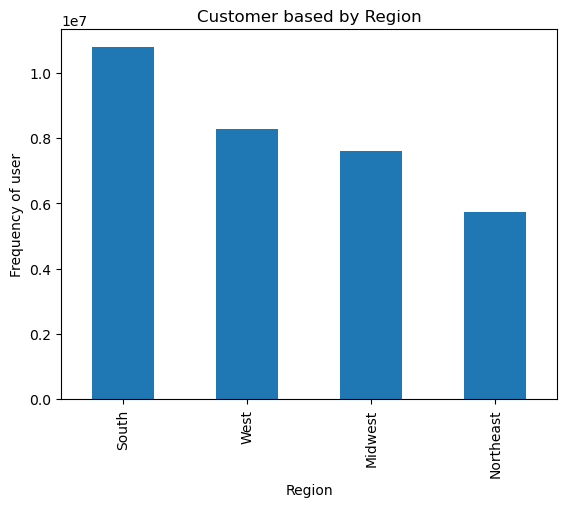

In [61]:
Cust_bar_region=ords_prods_cust_df['region'].value_counts().plot.bar()
plt.xlabel('Region')
plt.ylabel('Frequency of user')
plt.title('Customer based by Region')

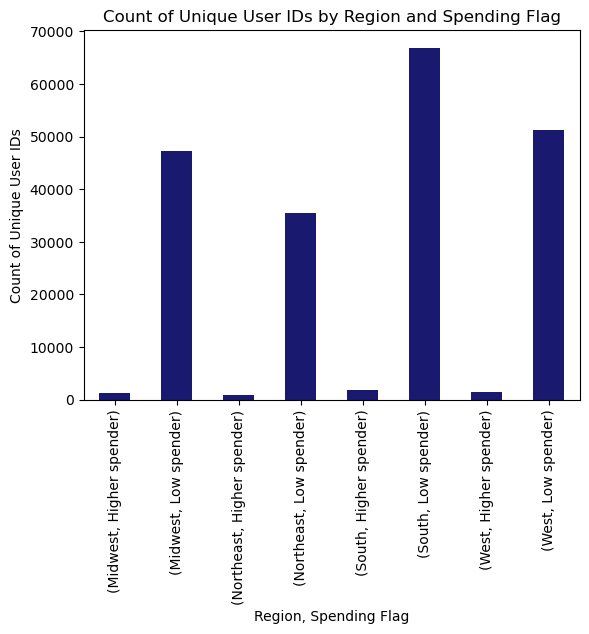

In [57]:
import matplotlib.colors as mcolors
# Group by 'region' and 'Spending_flag', count unique 'user_id', and reset index
plot_data = ords_prods_cust_df.groupby(['region', 'Spending_flag'])['user_id'].nunique().reset_index()

# Set 'region' and 'Spending_flag' as the index
plot_data.set_index(['region', 'Spending_flag'], inplace=True)

# Define colors for 'Lower Spender' and 'Higher Spender'
mcolors = {'Low spender': 'green', 'Higher spender': 'midnightblue'}

# Create a bar plot with custom colors
ax = plot_data.plot.bar(color=[mcolors[spending] for spending in plot_data.index.get_level_values('Spending_flag')], legend=False)

plt.title('Count of Unique User IDs by Region and Spending Flag')
plt.xlabel('Region, Spending Flag')
plt.ylabel('Count of Unique User IDs')


plt.show()


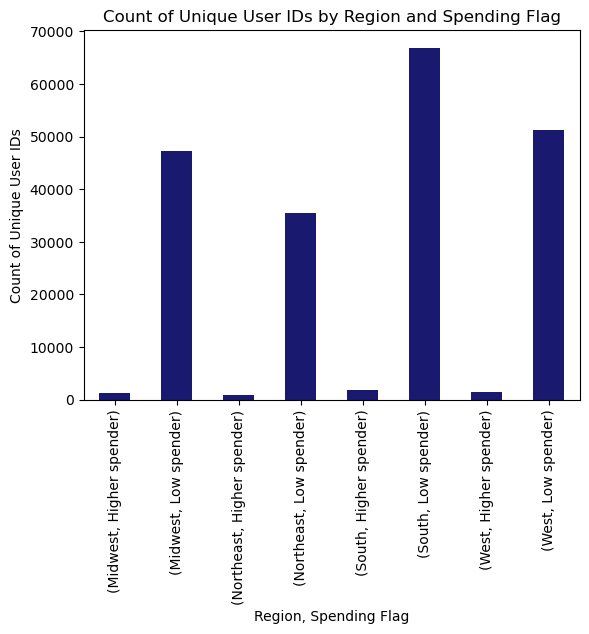

In [59]:
ax.figure


In [60]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spend_ID.png')) #to export data visualization



In [62]:
Cust_bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_custfreq_ID.png')) #to export data visualization


In [63]:
ords_prods_cust_df.to_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_merge_3.pkl'))